In [1]:
import sys, os
sys.path.append('../lib')
sys.path.append('../analysis')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from array import array

import uproot as ur
import ROOT as rt
rt.gErrorIgnoreLevel = rt.kError
rt.RooMsgService.instance().setGlobalKillBelow(rt.RooFit.ERROR)
import root_numpy as rtnp

from analysis_utilities import drawOnCMSCanvas, getEff, DSetLoader
from histo_utilities import create_TH1D, create_TH2D, std_color_list, SetMaxToMaxHist
from lumi_utilities import getLumiByTrigger

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Preliminary"

donotdelete = []

Welcome to JupyROOT 6.12/07


In [3]:
#They all have to be produced with the same pileup
MCsample = {
'tau' : DSetLoader('B0_TauNuDmst_PUc0'),
'mu' : DSetLoader('B0_MuNuDmst_PUc0'),
# 'DstmD0' : DSetLoader('B0_DstmD0_PUc0'),
# 'DstmDp' : DSetLoader('B0_DstmDp_PUc0'),
# 'DstmDsp' : DSetLoader('B0_DstmDsp_PUc0'),
# 'BpDstmHc' : DSetLoader('Bp_DstmHc_PUc0'),
# 'BmDstmHc' : DSetLoader('Bm_DstmHc_PUc0'),
# 'antiB0DstmHc' : DSetLoader('antiB0_DstmHc_PUc0'),
# 'DstPip' : DSetLoader('Bp_MuNuDstst_Pip_PUc0'),
# 'DstPi0' : DSetLoader('B0_MuNuDstst_Pi0_PUc0'),
# 'DstPipPi0' : DSetLoader('Bp_MuNuDstst_PipPi0_PUc0'),
# 'DstPipPim' : DSetLoader('B0_MuNuDstst_PipPim_PUc0'),
# 'DstPi0Pi0' : DSetLoader('B0_MuNuDstst_Pi0Pi0_PUc0'),
}

locRD = '../data/cmsRD/skimmed/B2DstMu_B0_200515_'

In [4]:
def getMultiplicityHisto(loc, n, cat, binning=[5, 0.5, 5.5]):
    f = open(loc)
    auxL = f.readlines()[1][1:-2].split(', ')
    f.close()
    
    h = create_TH1D(np.array([0]), name='mul'+n+cat, binning=binning, 
                    axis_title=['Number of B candidates', 'Normalized events'],
                   )
    for aux in auxL:
        nB, nE = aux.split(':')
        h.SetBinContent(h.GetXaxis().FindBin(int(nB)), int(nE))
    h.Scale(1./h.Integral())
    return h

In [5]:
histo = {}
for cat in ['Low', 'Mid', 'High']:
    histo[cat] = {}
    histo[cat]['data'] = getMultiplicityHisto(locRD + cat + '_corr.log', 'data', cat)
    histo[cat]['data'].SetLineColor(1)
    histo[cat]['data'].SetMarkerColor(1)
    for i, n in enumerate(['tau', 'mu']):
        s = MCsample[n]
        histo[cat][n] = getMultiplicityHisto(s.skimmed_dir + '/{}_corr.log'.format(cat), n, cat)
        histo[cat][n].SetLineColor(std_color_list[i])
        histo[cat][n].SetMarkerColor(std_color_list[i])
       
    h_aux = None
    for n in 

In [27]:
expectedLumi = {'Low':6.4, 'Mid':20.7, 'High':26.4} #fb^-1
label_dic = {'data' : 'Data',
             'mu'   : 'B#rightarrow D*#mu#nu',
             'tau'  : 'B#rightarrow D*#tau#nu',
             'Hc'   : 'B#rightarrow D*H_{c}',
             'DstD'   : 'B#rightarrow D*D(#muX)',
             'BpDstst': 'B^{+}#rightarrow D**#mu#nu',
             'B0Dstst': 'B^{0}#rightarrow D**#mu#nu'
            }

In [28]:
l = rt.TLatex()
l.SetTextAlign(11)
l.SetTextSize(0.05)
l.SetTextFont(42)

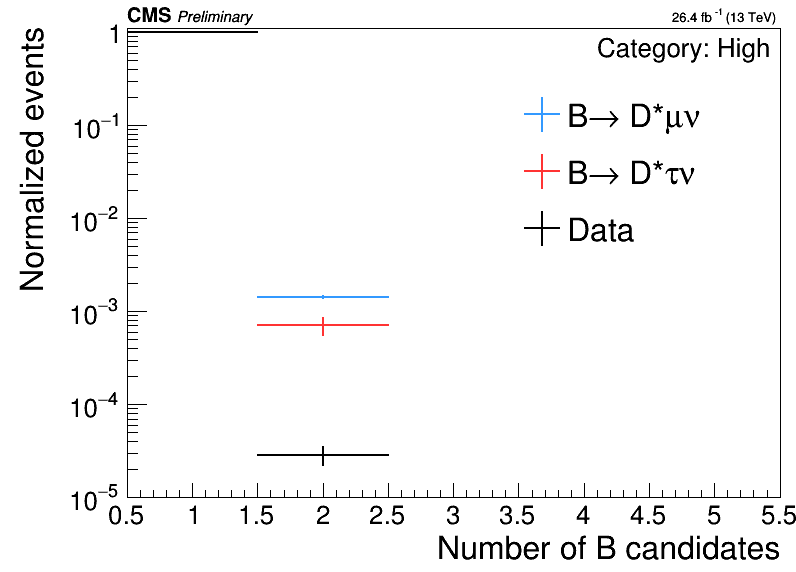

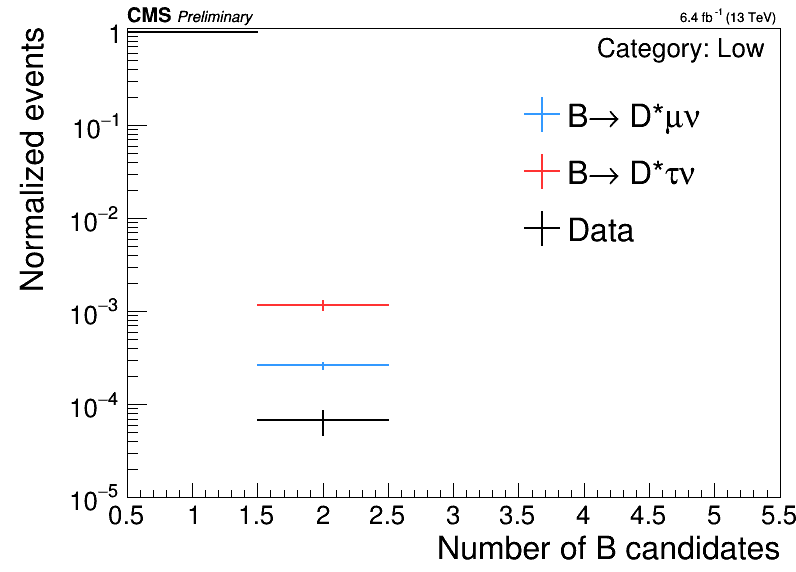

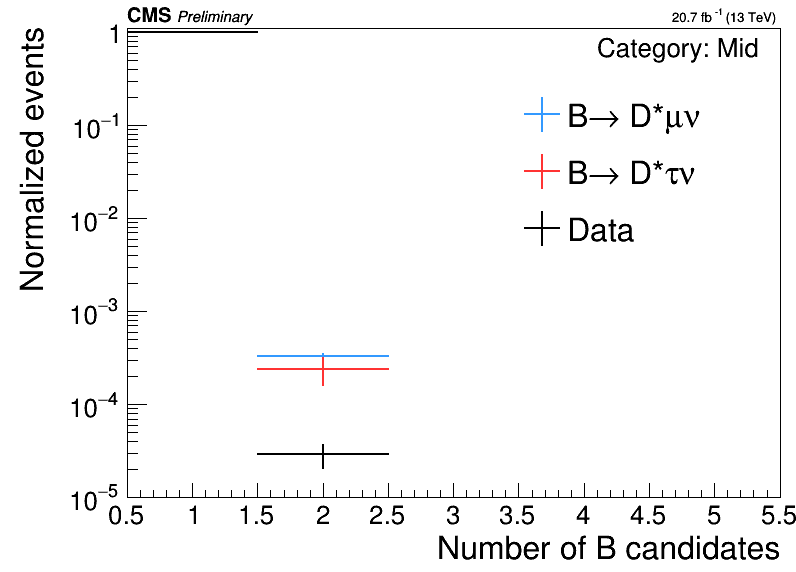

In [34]:
dnd = []

for cat in histo.keys():
    CMS_lumi.integrated_lumi = expectedLumi[cat]
    hl = histo[cat].values()
    m = SetMaxToMaxHist(hl)
    hl[0].GetYaxis().SetRangeUser(1e-5, m)
    c = drawOnCMSCanvas(CMS_lumi, hl, 'same', tag=cat)
    c.SetLogy()

    l.DrawLatexNDC(0.75, 0.9, 'Category: '+cat)

    leg = rt.TLegend(0.65, 0.55, 0.9, 0.85)
    leg.SetLineWidth(0)
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    leg.SetFillStyle(0)
    for n, h in histo[cat].iteritems():
        leg.AddEntry(h, label_dic[n], 'lep')
    leg.Draw()
    dnd.append([c, leg])

In [16]:
hl['data'].GetMaximumBin()

1